<a href="https://colab.research.google.com/github/00000036866IMUStudent/HIA303_GroupProject/blob/main/HIA303_GP_detect_breast_cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Dataset loading

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.data',header=None,na_values='?')
df.columns = ['id_no','clump_thickness','cellsize_uniformity','cellshape_uniformity','Marginal_Adhesion','cell_size_single_ep',\
 'bare_nuclei_size','bland_chrom_size','normal_nucleoli_size','mitoses','class']
df.head()

,id_no,clump_thickness,cellsize_uniformity,cellshape_uniformity,Marginal_Adhesion,cell_size_single_ep,bare_nuclei_size,bland_chrom_size,normal_nucleoli_size,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


### Dataset exploration

In [ ]:
df.isna().sum()

id_no                    0
clump_thickness          0
cellsize_uniformity      0
cellshape_uniformity     0
Marginal_Adhesion        0
cell_size_single_ep      0
bare_nuclei_size        16
bland_chrom_size         0
normal_nucleoli_size     0
mitoses                  0
class                    0
dtype: int64

In [ ]:
df = df.fillna(round(df['bare_nuclei_size'].mean(),0))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_no                 699 non-null    int64  
 1   clump_thickness       699 non-null    int64  
 2   cellsize_uniformity   699 non-null    int64  
 3   cellshape_uniformity  699 non-null    int64  
 4   Marginal_Adhesion     699 non-null    int64  
 5   cell_size_single_ep   699 non-null    int64  
 6   bare_nuclei_size      699 non-null    float64
 7   bland_chrom_size      699 non-null    int64  
 8   normal_nucleoli_size  699 non-null    int64  
 9   mitoses               699 non-null    int64  
 10  class                 699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


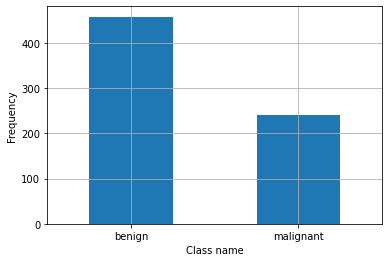

In [ ]:
# display of class distribution
df['class'] = np.where(df['class']==2,'benign','malignant')
df['class'].value_counts().plot.bar(rot=0)
plt.grid()
plt.xlabel('Class name')
plt.ylabel('Frequency')
plt.show()
df = df.drop(columns= ['id_no'])

In [ ]:
# descriptive statistics of features
df.drop(columns=['class']).describe()

,clump_thickness,cellsize_uniformity,cellshape_uniformity,Marginal_Adhesion,cell_size_single_ep,bare_nuclei_size,bland_chrom_size,normal_nucleoli_size,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.555079,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602496,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


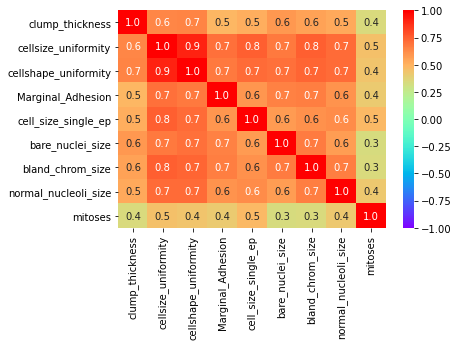

In [ ]:
# correlation between features
sns.heatmap(df.drop(columns=['class']).corr(),annot=True,fmt='.1f',vmin=-1,vmax=1,cmap='rainbow')
plt.show()

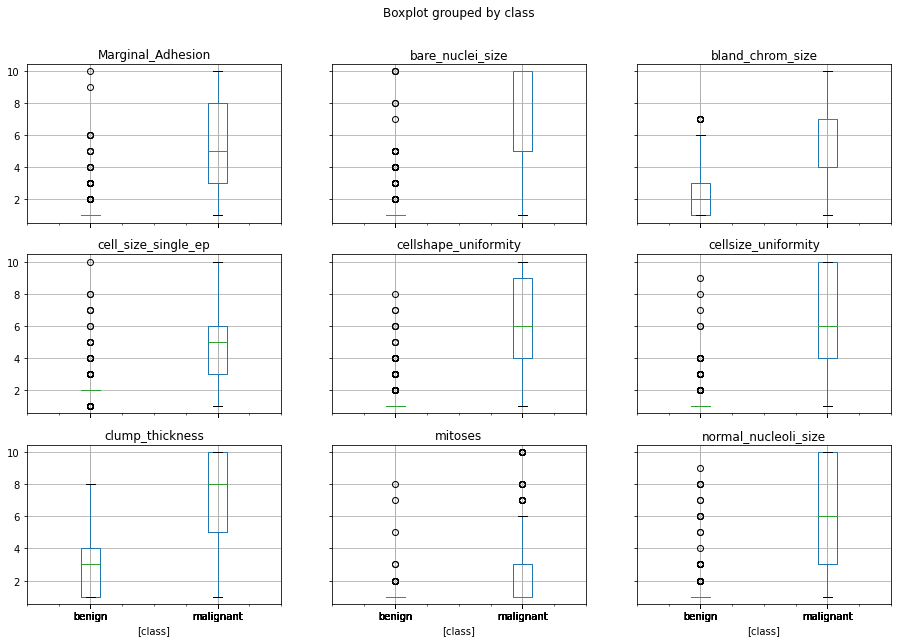

In [ ]:
# Distribution of features by boxplots grouped by class
df.boxplot(by='class',rot=0,figsize=(15,10))
plt.show()

### Feature and target seperation and train-test splitting

In [ ]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=639)
print('Train set feature shape:',X_train.shape)
print('Test set feature shape:',X_test.shape)

Train set feature shape: (524, 9)
Test set feature shape: (175, 9)


### KNN model fitting

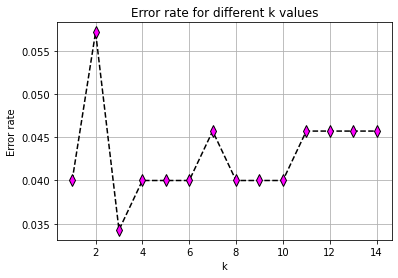

In [ ]:
err = []
for k in range(1,15):
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(X_train,y_train)
    ypreds = knnmodel.predict(X_test)
    err.append(np.mean(ypreds!=y_test))
plt.plot(range(1,15),err,color='black', linestyle='dashed', marker='d',markerfacecolor='magenta', markersize=8)
plt.xlabel('k')
plt.ylabel('Error rate')
plt.grid()
plt.title('Error rate for different k values')
plt.show()

KNN model parameters:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


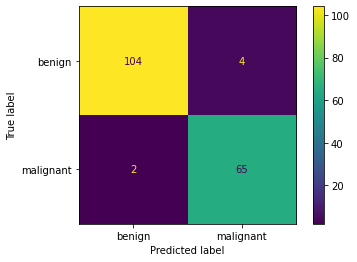

Classification report in test set: 
               precision    recall  f1-score   support

      benign       0.98      0.96      0.97       108
   malignant       0.94      0.97      0.96        67

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



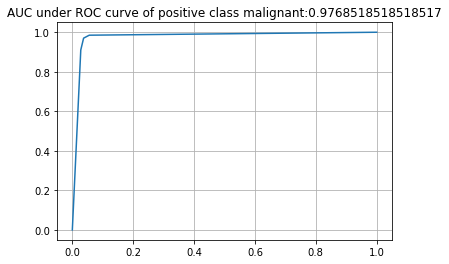

In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
ypreds = knnmodel.predict(X_test)
print('KNN model parameters:\n',knnmodel.get_params())
probs = knnmodel.predict_proba(X_test)
plot_confusion_matrix(knnmodel,X_test, y_test)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['benign','malignant']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='malignant')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive class malignant:'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

### Logistic regression

Logistic regression model parameters:
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.9, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'elasticnet', 'random_state': 386, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


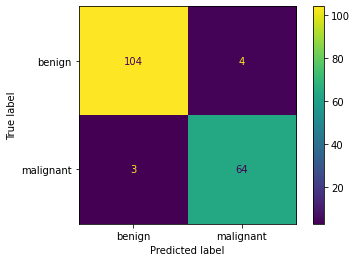

Classification report in test set: 
               precision    recall  f1-score   support

      benign       0.97      0.96      0.97       108
   malignant       0.94      0.96      0.95        67

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



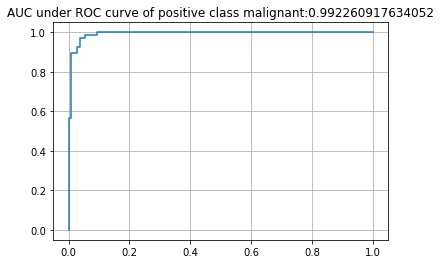

In [ ]:
logitmodel = LogisticRegression(random_state=386,n_jobs=-1,max_iter=1000,solver='saga',C=0.1,l1_ratio=0.9,penalty='elasticnet')
logitmodel.fit(X_train, y_train)
ypreds = logitmodel.predict(X_test)
print('Logistic regression model parameters:\n',logitmodel.get_params())
probs = logitmodel.predict_proba(X_test)
plot_confusion_matrix(logitmodel,X_test, y_test)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['benign','malignant']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='malignant')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive class malignant:'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

### Multi-layer perceptron neural network

MLP neural network model parameters:
 {'activation': 'relu', 'alpha': 1e-06, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (60, 40), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 20000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 938, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


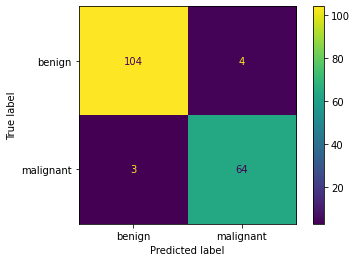

Classification report in test set: 
               precision    recall  f1-score   support

      benign       0.97      0.96      0.97       108
   malignant       0.94      0.96      0.95        67

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



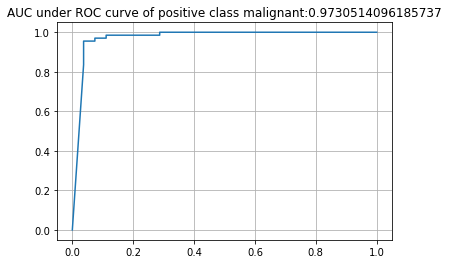

In [ ]:
mlpmodel = MLPClassifier(random_state=938, max_iter=1000,solver='lbfgs',hidden_layer_sizes=(60,40),alpha=1e-6,max_fun=20000)
mlpmodel.fit(X_train, y_train)
ypreds = mlpmodel.predict(X_test)
print('MLP neural network model parameters:\n',mlpmodel.get_params())
probs = mlpmodel.predict_proba(X_test)
plot_confusion_matrix(mlpmodel,X_test, y_test)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['benign','malignant']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='malignant')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive class malignant:'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

### Decision tree

Decision tree model parameters:
 {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 458, 'splitter': 'random'}


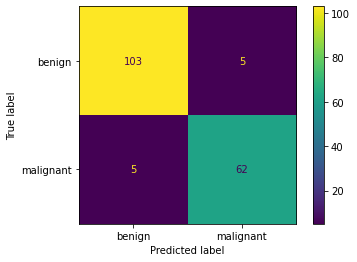

Classification report in test set: 
               precision    recall  f1-score   support

      benign       0.95      0.95      0.95       108
   malignant       0.93      0.93      0.93        67

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



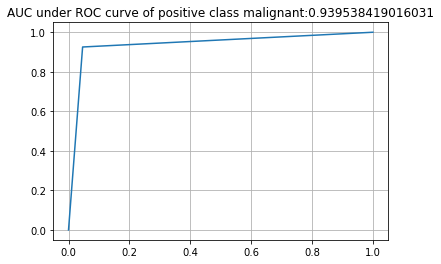

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=458,splitter='random',max_depth= 20,ccp_alpha=1e-4)
dtmodel.fit(X_train, y_train)
ypreds = dtmodel.predict(X_test)
print('Decision tree model parameters:\n',dtmodel.get_params())
probs = dtmodel.predict_proba(X_test)
plot_confusion_matrix(dtmodel,X_test, y_test)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['benign','malignant']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='malignant')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive class malignant:'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

### Support vector machine classifier

Support vector machine model parameters:
 {'C': 20, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 389, 'shrinking': True, 'tol': 0.001, 'verbose': False}


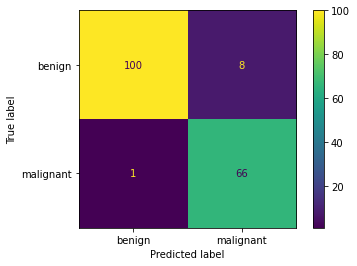

Classification report in test set: 
               precision    recall  f1-score   support

      benign       0.99      0.93      0.96       108
   malignant       0.89      0.99      0.94        67

    accuracy                           0.95       175
   macro avg       0.94      0.96      0.95       175
weighted avg       0.95      0.95      0.95       175



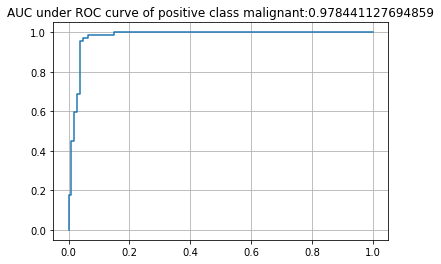

In [ ]:
svc = SVC(gamma='auto',C=20,kernel='rbf',random_state=389,probability=True)
svc.fit(X_train, y_train)
ypreds = svc.predict(X_test)
print('Support vector machine model parameters:\n',svc.get_params())
probs = svc.predict_proba(X_test)
plot_confusion_matrix(svc,X_test, y_test)
plt.show()
print('Classification report in test set: \n',classification_report(y_test,ypreds,\
                                                           labels = ['benign','malignant']))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label='malignant')
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive class malignant:'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()